### Inicializamos la variable contador counter en 0

In [1672]:
counter = 0

### Inicializamos arrays

In [1673]:
arr_1 = [1, 2, 5, 3, 4]
arr_2 = [1, 2, 7, 6, 10, 3, 4, 5, 9, 8]
arr_3 = [10, 15, 7, 2, 1, 3, 6, 14, 9, 8, 4, 13, 12, 11, 5]

# Mejor Caso
arr_4 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

arr_5 = [2, 1, 17, 4, 20, 6, 7, 8, 9, 11, 10, 12, 14, 13, 15, 16, 3, 18, 19, 5]
arr_6 = [20, 18, 19, 12, 15, 11, 14, 8, 10, 9, 5, 4, 13, 7, 1, 16, 17, 2, 3, 6]

# Peor Caso
arr_7 = [20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

arr_8 = [12, 5, 23, 8, 19, 30, 1, 6, 14, 25, 11, 3, 21, 27, 7, 9, 4, 16, 15, 10, 28, 2, 17, 18, 13, 29, 20, 22, 26, 24]
arr_9 = [38, 14, 7, 23, 29, 19, 3, 27, 12, 41, 11, 46, 1, 36, 5, 18, 34, 24, 4, 50, 33, 25, 20, 15, 31, 45, 22, 9, 10, 8, 40, 2, 49, 30, 39, 13, 26, 48, 16, 28, 44, 32, 17, 42, 6, 14, 35, 37, 43, 47]
arr_10 = [87, 34, 22, 18, 97, 41, 85, 73, 53, 56, 38, 82, 69, 1, 31, 54, 16, 7, 50, 58, 19, 29, 86, 39, 76, 12, 30, 91, 3, 32, 83, 49, 99, 61, 5, 20, 70, 23, 57, 60, 77, 9, 10, 92, 67, 80, 46, 95, 72, 40, 62, 84, 11, 48, 64, 45, 37, 94, 35, 65, 4, 44, 25, 66, 88, 55, 15, 42, 26, 8, 72, 24, 2, 13, 17, 78, 68, 75, 27, 100, 74, 33, 52, 93, 14, 59, 71, 90, 81, 96, 63, 88]

arrays = [arr_1, arr_2, arr_3, arr_4, arr_5, arr_6, arr_7, arr_8, arr_9, arr_10]

### Implementamos función para imprimir los resultados

In [1674]:
def print_results(array, func):
    global counter
    counter = 0
    print(func(array.copy()))

### Implementamos función para obtener resultados

In [1675]:
def get_results(array, func):
    global counter
    counter = 0
    return func(array.copy())

### Implementamos función para obtener metricas

In [1676]:
def get_counting_sort_results(arrays, sorting_function):
    results = []
    for arr in arrays:
        result = get_results(arr, sorting_function)
        results.append(result)
    return results

### Implementamos función comparación entre arrays grafico

In [1677]:
labels_arrays = ["Array 1", "Array 2", "Array 3", "Array 4", "Array 5", "Array 6", "Array 7", "Array 8", "Array 9", "Array 10"]

import numpy as np
import matplotlib.pyplot as plt

def plot_comparisons_arrays(title, sort_methods, comparisons1, comparisons2, label1, label2):
    x = np.arange(len(sort_methods))  # Posiciones de las barras
    width = 0.35  # Ancho de las barras

    fig, ax = plt.subplots(figsize=(10, 6))

    # Crear las barras agrupadas
    bars1 = ax.bar(x - width/2, comparisons1, width, label=label1, color='skyblue')
    bars2 = ax.bar(x + width/2, comparisons2, width, label=label2, color='salmon')

    # Añadir títulos y etiquetas
    ax.set_title(title)
    ax.set_xlabel('Métodos de Ordenamiento')
    ax.set_ylabel('Cantidad de Comparaciones')
    ax.set_xticks(x)
    ax.set_xticklabels(sort_methods)
    ax.legend()

    # Agregar etiquetas en cada barra
    for bars in (bars1, bars2):
        for bar in bars:
            height = bar.get_height()
            ax.annotate('{}'.format(height),
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 puntos verticalmente
                        textcoords="offset points",
                        ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

### Counting Sort Secuencial

In [1678]:
def counting_sort(arr):
    global counter

    # Encuentra el valor máximo en el array
    max_val = max(arr)
    # Crea un array de conteo inicializado a 0
    count = [0] * (max_val + 1)
    # Crea un array de salida
    output = [0] * len(arr)

    # Cuenta la ocurrencia de cada valor en el array
    for num in arr:
        count[num] += 1
        counter += 1  # Incrementa el contador por cada iteración

    # Modifica el array de conteo para que contenga las posiciones
    for i in range(1, len(count)):
        count[i] += count[i - 1]
        counter += 1  # Incrementa el contador

    # Construye el array de salida
    for num in reversed(arr):
        output[count[num] - 1] = num
        count[num] -= 1
        counter += 1  # Incrementa el contador

    return counter

### Counting Sort Concurrente

In [1679]:
import threading

lock = threading.Lock()  # Para sincronizar el acceso al contador

def get_max(arr):
    global counter
    mx = arr[0]
    for i in range(1, len(arr)):
        counter += 1  # Contar comparación
        if arr[i] > mx:
            mx = arr[i]
    return mx

def count_occurrences(arr, count, exp, start, end):
    local_count = [0] * 10  # Contador local por hilo
    for i in range(start, end):
        digit = (arr[i] // exp) % 10
        local_count[digit] += 1

    # Sumar el contador local al global
    with lock:
        for i in range(10):
            count[i] += local_count[i]

def count_sort(arr, exp):
    global counter
    output = [0] * len(arr)
    count = [0] * 10

    # Crear hilos para contar ocurrencias
    num_threads = 2
    threads = []
    length = len(arr)
    for i in range(num_threads):
        start = i * (length // num_threads)
        end = (i + 1) * (length // num_threads) if i < num_threads - 1 else length
        thread = threading.Thread(target=count_occurrences, args=(arr, count, exp, start, end))
        threads.append(thread)
        thread.start()

    # Esperar a que todos los hilos terminen
    for thread in threads:
        thread.join()

    # Cambiar count[i] para que contenga la posición real en output[]
    for i in range(1, 10):
        count[i] += count[i - 1]

    # Construir el array de salida
    for i in range(len(arr) - 1, -1, -1):
        counter += 1  # Contar acceso a count
        output[count[(arr[i] // exp) % 10] - 1] = arr[i]
        count[(arr[i] // exp) % 10] -= 1

    # Copiar el array de salida a arr[]
    for i in range(len(arr)):
        arr[i] = output[i]

def parallel_count_sort(arr):
    global counter

    m = get_max(arr)  # Encuentra el máximo elemento en el array

    # Realizar counting sort para cada dígito
    exp = 1
    while m // exp > 0:
        count_sort(arr, exp)  # Llama a la función de counting sort
        exp *= 10

    return counter + 1  # Devuelve el contador de comparaciones


### Comparación arrays Conting Sort Secuencial vs Concurrente

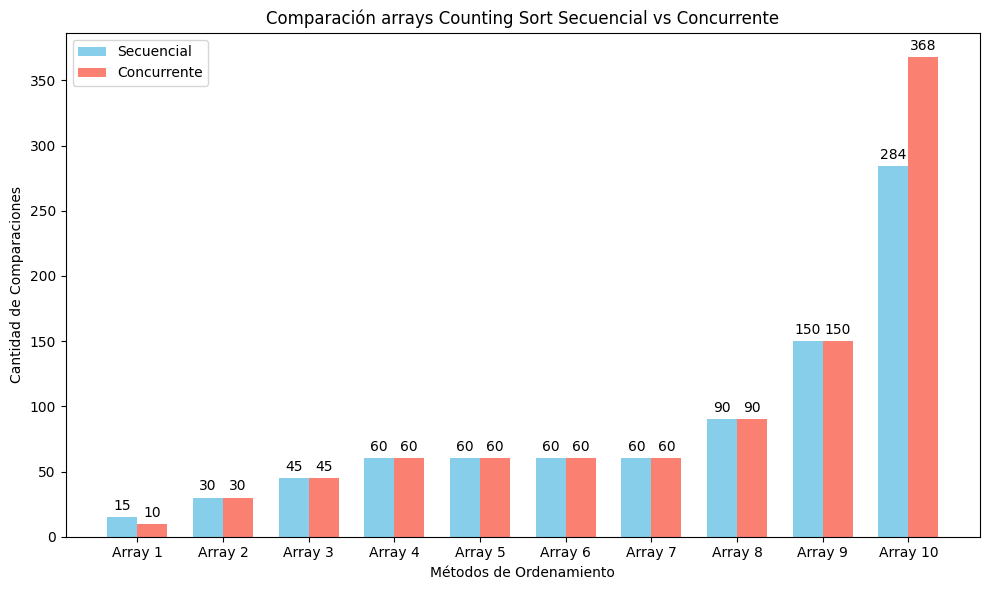

In [1680]:
counting_sort_sec = get_counting_sort_results(arrays, counting_sort)
counting_sort_conc = get_counting_sort_results(arrays, parallel_count_sort)


plot_comparisons_arrays("Comparación arrays Counting Sort Secuencial vs Concurrente", labels_arrays, counting_sort_sec, counting_sort_conc, 'Secuencial', 'Concurrente')

### Bubble Sort Secuencial

In [1681]:
def bubble_sort(arr):
    global counter

    n = len(arr)
    # Recorre todo el array
    for i in range(n):
        # Bandera para optimizar
        swapped = False
        # Compara elementos restando 1 por cada ciclo
        for j in range(0, n - i - 1):
            counter += 1  # Incrementa el contador
            if arr[j] > arr[j + 1]:
                # Intercambia si están en el orden incorrecto
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swapped = True
        # Si no se hicieron intercambios, el array ya está ordenado
        if not swapped:
            break

    return counter

### Bubble Sort Concurrent

In [1682]:
import threading

def bubble_sort_partial(arr, start, end):
    global counter

    n = end - start
    for i in range(n):
        swapped = False
        for j in range(start, end - i - 1):
            counter += 1  # Incrementa el contador
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swapped = True
        if not swapped:
            break

def concurrent_bubble_sort(arr):
    n = len(arr)
    if n < 2:
        return arr

    threads = []
    
    # Dividir el trabajo entre 2 hilos
    mid = n // 2
    
    # Crear dos hilos para ordenar las dos mitades
    thread1 = threading.Thread(target=bubble_sort_partial, args=(arr, 0, mid))
    thread2 = threading.Thread(target=bubble_sort_partial, args=(arr, mid, n))
    
    threads.append(thread1)
    threads.append(thread2)

    # Iniciar los hilos
    for thread in threads:
        thread.start()
    
    # Esperar a que ambos hilos terminen
    for thread in threads:
        thread.join()

    # Después de que ambos hilos hayan terminado, hacer un bubble sort para mezclar las partes
    # Esto asegura que el array completo esté ordenado
    bubble_sort_partial(arr, 0, n)  # Ordenar todo el array

    return counter

### Comparación arrays Bobble Sort Secuencial vs Concurrente

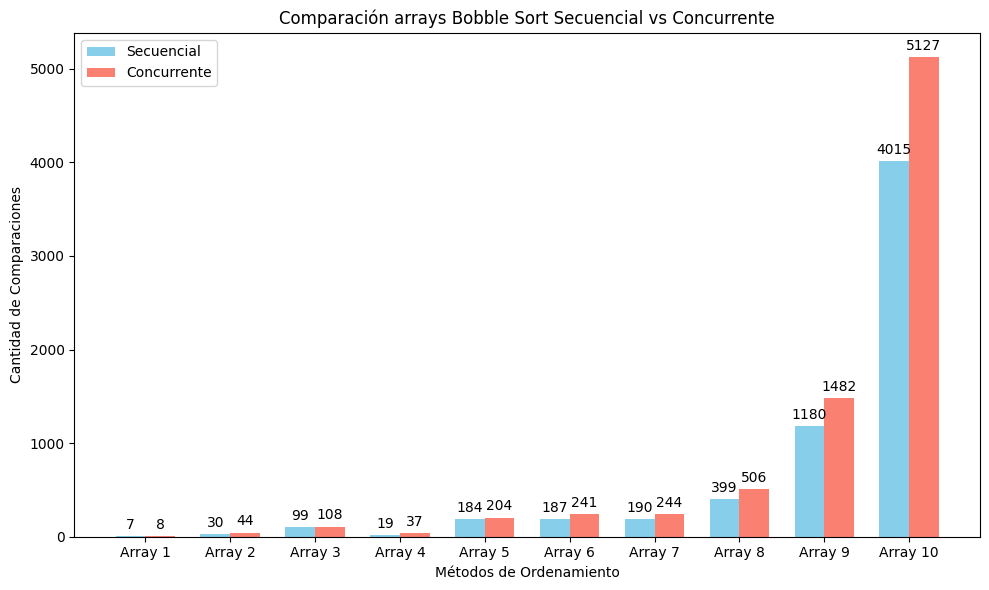

In [1683]:
bubble_sort_sec = get_counting_sort_results(arrays, bubble_sort)
bubble_sort_conc = get_counting_sort_results(arrays, concurrent_bubble_sort)


plot_comparisons_arrays("Comparación arrays Bobble Sort Secuencial vs Concurrente", labels_arrays, bubble_sort_sec, bubble_sort_conc, 'Secuencial', 'Concurrente')

### Quick Sort Secuencial

In [1684]:
# Variable global
counter = 0

def quick_sort(arr):
    global counter
    counter = 0  # Reiniciar el contador al inicio de la función

    def _quick_sort(arr):
        global counter  # Usar la variable global counter
        if len(arr) <= 1:
            return

        pivot = arr[len(arr) // 2]  # Elegir el pivote
        left = []
        middle = []
        right = []

        for x in arr:
            counter += 1  # Contar la comparación
            if x < pivot:
                left.append(x)  # Elementos menores que el pivote
            elif x == pivot:
                middle.append(x)  # Elementos iguales al pivote
            else:
                right.append(x)  # Elementos mayores que el pivote

        # Recursivamente ordenar las particiones
        _quick_sort(left)
        _quick_sort(right)

    _quick_sort(arr)
    return counter

### Quick Sort Concurrente

In [1685]:
import threading
lock = threading.Lock()

def concurrent_quick_sort(arr):
    global counter

    def _concurrent_quick_sort(arr):
        global counter  # Usar la variable global counter
        if len(arr) <= 1:
            return arr

        pivot = arr[len(arr) // 2]  # Elegir el pivote
        left = []
        middle = []
        right = []

        for x in arr:
            with lock:  # Asegura que el acceso a counter sea seguro
                counter += 1  # Contar la comparación
            if x < pivot:
                left.append(x)  # Elementos menores que el pivote
            elif x == pivot:
                middle.append(x)  # Elementos iguales al pivote
            else:
                right.append(x)  # Elementos mayores que el pivote

        left_sorted = []
        right_sorted = []

        # Crear hilos para las particiones
        left_thread = threading.Thread(target=lambda: left_sorted.extend(_concurrent_quick_sort(left)))
        right_thread = threading.Thread(target=lambda: right_sorted.extend(_concurrent_quick_sort(right)))

        left_thread.start()
        right_thread.start()

        # Esperar a que los hilos terminen
        left_thread.join()
        right_thread.join()

        return left_sorted + middle + right_sorted

    _concurrent_quick_sort(arr)
    
    return counter

### Comparación arrays Quick Sort Secuencial vs Concurrente

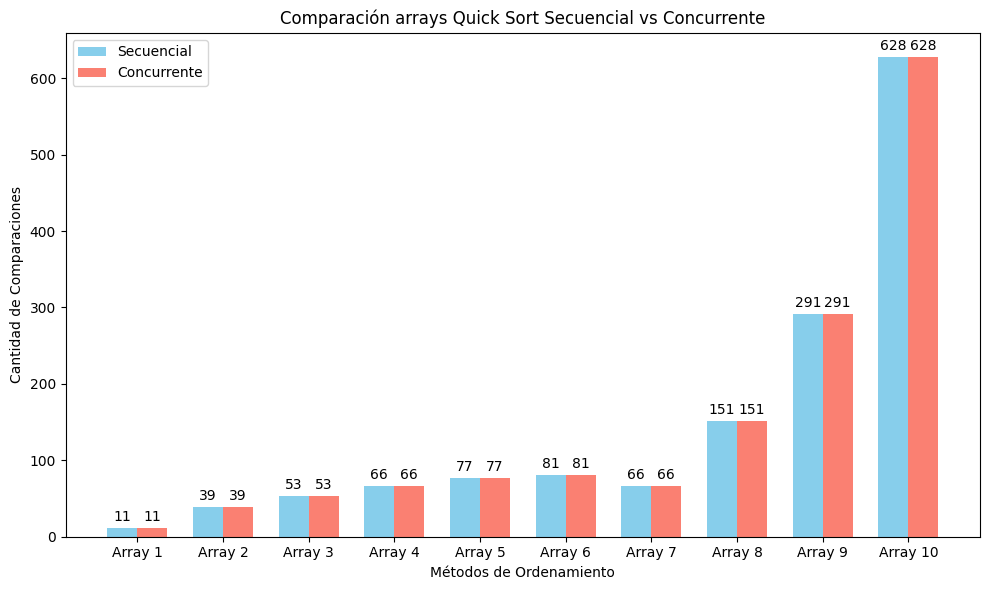

In [1686]:
quick_sort_sec = get_counting_sort_results(arrays, quick_sort)
quick_sort_conc = get_counting_sort_results(arrays, concurrent_quick_sort)


plot_comparisons_arrays("Comparación arrays Quick Sort Secuencial vs Concurrente", labels_arrays, quick_sort_sec, quick_sort_conc, 'Secuencial', 'Concurrente')

### Merge Sort Secuencial

In [1687]:
def merge_sort(arr):
    global counter

    def _merge_sort(arr):
        global counter
        if len(arr) <= 1:
            return arr

        mid = len(arr) // 2  # Encontrar el punto medio
        left = _merge_sort(arr[:mid])  # Ordenar la mitad izquierda
        right = _merge_sort(arr[mid:])  # Ordenar la mitad derecha

        return merge(left, right)

    def merge(left, right):
        global counter
        result = []
        i = j = 0

        while i < len(left) and j < len(right):
            counter += 1  # Contar la comparación
            if left[i] <= right[j]:
                result.append(left[i])
                i += 1
            else:
                result.append(right[j])
                j += 1

        # Agregar los elementos restantes
        result.extend(left[i:])
        result.extend(right[j:])
        
        return result

    _merge_sort(arr)
    return counter

### Merge Sort Concurrente

In [1688]:
import threading

# Variable global
counter = 0
lock = threading.Lock()  # Para proteger el acceso a counter

def concurrent_merge_sort(arr):
    global counter
    counter = 0  # Reiniciar el contador al inicio de la función

    def _concurrent_merge_sort(arr):
        global counter
        if len(arr) <= 1:
            return arr

        mid = len(arr) // 2  # Encontrar el punto medio
        left = []
        right = []

        # Crear hilos para ordenar las mitades
        left_thread = threading.Thread(target=lambda: left.extend(_concurrent_merge_sort(arr[:mid])))
        right_thread = threading.Thread(target=lambda: right.extend(_concurrent_merge_sort(arr[mid:])))

        left_thread.start()
        right_thread.start()

        # Esperar a que ambos hilos terminen
        left_thread.join()
        right_thread.join()

        return concurrent_merge(left, right)

    def concurrent_merge(left, right):
        global counter
        result = []
        i = j = 0

        while i < len(left) and j < len(right):
            with lock:  # Asegurar acceso seguro al contador
                counter += 1  # Contar la comparación
            if left[i] <= right[j]:
                result.append(left[i])
                i += 1
            else:
                result.append(right[j])
                j += 1

        # Agregar los elementos restantes
        result.extend(left[i:])
        result.extend(right[j:])
        
        return result

    sorted_array = _concurrent_merge_sort(arr)
    return counter

13


### Comparación arrays Merge Sort Secuencial vs Concurrente

In [ ]:
merge_sort_sec = get_counting_sort_results(arrays, merge_sort)
merge_sort_conc = get_counting_sort_results(arrays, concurrent_merge_sort)


plot_comparisons_arrays("Comparación arrays Merge Sort Secuencial vs Concurrente", labels_arrays, quick_sort_sec, quick_sort_conc, 'Secuencial', 'Concurrente')